# Movimiento circular

Cuando el movimiento se da en un cículo de radio $R$, la posición es descrita por

$$\vec{r}(t)=R (\cos(\theta(t))\hat{i}+\sin(\theta(t))\hat{j}).$$

Definiendo los vectores unitarios radial y angular (son perpendiculares entre sí) como:
$$\hat{r}(t):=\cos(\theta(t))\hat{i}+\sin(\theta(t))\hat{j}, \quad \hat{\theta}(t):=-\sin(\theta(t))\hat{i}+\cos(\theta(t))\hat{j},$$

es posible escribir la velocidad y la aceleración del cuerpo como:
$$\vec{v}(t)=R\omega(t)\hat{\theta}(t), \quad \vec{a}(t)=a_T(t) \hat{\theta}(t)-a_C(t)\hat{r}(t),$$

donde

$\omega(t):=\frac{d\theta(t)}{dt}$ es la rapidez angular.

$\alpha(t):=\frac{d\omega(t)}{dt}$ es la aceleración angular.

$a_T(t):=R \alpha(t)$ es la aceleración tangencial o angular.

$a_C(t):=R \omega^2(t)$ es la aceleración centrípeta o radial.

Si $\theta$ se mide en radianes y el tiempo en segundos, entonces $\omega(t)$ tiene unidades de [rad/s] y $\alpha(t)$ tiene unidades de [rad/s$^2$].

Además se definen:

$f=\frac{\omega}{2\pi}$ y $T=\frac{1}{f}=\frac{2\pi}{\omega}$ como la frecuencia y el período del movimiento.

Así, si el tiempo se mide en segundos, el período también y la frecuencia en $[\frac{1}{s}]=[Hz]$

# Ecuaciones

Supongamos $$\theta(t)=\theta_{0}+\omega_{0}t+\frac{\alpha_{0}}{2}t^2+\frac{\delta_0}{3}t^3.$$

In [1]:
#Written by Nataly Ibarra at August 2016.
#Licensed under Creative Commons 4.0. See http://creativecommons.org/licenses/by/4.0
#For details contact natalynicole.ibarravera@gmail.com
%matplotlib inline 
# Esta línea permite incrustar gráficos en el notebook
import matplotlib.pyplot as plt # Se importa paquete que permite graficar
import numpy as np # Se import paquete que hace cálculos numéricos
import sympy as sp # Se importa paquete que hace cáculos simbólicos

In [2]:
#se definen variables simbólicas a emplear
t = sp.Symbol('t')
R = sp.Symbol('R')
theta0 = sp.Symbol('theta0')
omega0 = sp.Symbol('omega0')
alpha0 = sp.Symbol('alpha0')
delta0 = sp.Symbol('delta0')
theta = sp.Function('theta')(t)

In [3]:
theta = theta0+omega0*t+(alpha0/2)*t**2+(delta0/3)*t**3 #MCU
#theta = theta0+omega0*t+(alpha0/2)*t**2 #MCUA
#theta = theta0+omega*t #MCU
omega = theta.diff(t)
alpha = omega.diff(t)

In [4]:
print(r'$\theta(t)$ =',theta)
print(r'$\omega(t)$ =',omega)
print(r'$\alpha(t)$ =',alpha)

$\theta(t)$ = alpha0*t**2/2 + delta0*t**3/3 + omega0*t + theta0
$\omega(t)$ = alpha0*t + delta0*t**2 + omega0
$\alpha(t)$ = alpha0 + 2*delta0*t


In [5]:
x = sp.Function('x')(t)
y = sp.Function('y')(t)
x = R*sp.cos(theta)
y = R*sp.sin(theta)
vx = x.diff(t)
vy = y.diff(t)
ax = vx.diff(t)
ay = vy.diff(t)
print(70*'=')
print('x(t)=',x)
print('y(t)=',y)
print('vx(t) =',vx)
print('vy(t) =',vy)
print('ax(t) =',ax)
print('ay(t) =',ay)
print(70*'=')

x(t)= R*cos(alpha0*t**2/2 + delta0*t**3/3 + omega0*t + theta0)
y(t)= R*sin(alpha0*t**2/2 + delta0*t**3/3 + omega0*t + theta0)
vx(t) = -R*(alpha0*t + delta0*t**2 + omega0)*sin(alpha0*t**2/2 + delta0*t**3/3 + omega0*t + theta0)
vy(t) = R*(alpha0*t + delta0*t**2 + omega0)*cos(alpha0*t**2/2 + delta0*t**3/3 + omega0*t + theta0)
ax(t) = -R*(alpha0 + 2*delta0*t)*sin(alpha0*t**2/2 + delta0*t**3/3 + omega0*t + theta0) - R*(alpha0*t + delta0*t**2 + omega0)**2*cos(alpha0*t**2/2 + delta0*t**3/3 + omega0*t + theta0)
ay(t) = R*(alpha0 + 2*delta0*t)*cos(alpha0*t**2/2 + delta0*t**3/3 + omega0*t + theta0) - R*(alpha0*t + delta0*t**2 + omega0)**2*sin(alpha0*t**2/2 + delta0*t**3/3 + omega0*t + theta0)


In [6]:
th = sp.lambdify((t,theta0,omega0,alpha0,delta0),theta)
th_v = np.vectorize(th)
dth = sp.lambdify((t,theta0,omega0,alpha0,delta0),omega)
dth_v = np.vectorize(dth)
ddth = sp.lambdify((t,theta0,omega0,alpha0,delta0),alpha)
ddth_v = np.vectorize(ddth)
#
xx = sp.lambdify((t,R,theta0,omega0,alpha0,delta0),x)
x_v = np.vectorize(xx)
yy = sp.lambdify((t,R,theta0,omega0,alpha0,delta0),y)
y_v = np.vectorize(yy)
#
vvx = sp.lambdify((t,R,theta0,omega0,alpha0,delta0),vx)
vx_v = np.vectorize(vvx)
vvy = sp.lambdify((t,R,theta0,omega0,alpha0,delta0),vy)
vy_v = np.vectorize(vvy)
#
aax = sp.lambdify((t,R,theta0,omega0,alpha0,delta0),ax)
ax_v = np.vectorize(aax)
aay = sp.lambdify((t,R,theta0,omega0,alpha0,delta0),ay)
ay_v = np.vectorize(aay)
#
def a_c(R,omega):
    return R*omega**2
def a_t(R,alpha):
    return R*alpha
def dynamics(t,R,theta0,omega0,alpha0,delta0):
    return [th_v(t,theta0,omega0,alpha0,delta0),dth_v(t,theta0,omega0,alpha0,delta0),
            ddth_v(t,theta0,omega0,alpha0,delta0),
            x_v(t,R,theta0,omega0,alpha0,delta0),y_v(t,R,theta0,omega0,alpha0,delta0),
            vx_v(t,R,theta0,omega0,alpha0,delta0),vy_v(t,R,theta0,omega0,alpha0,delta0),
            ax_v(t,R,theta0,omega0,alpha0,delta0),ay_v(t,R,theta0,omega0,alpha0,delta0)]

In [7]:
def plot_dynamics(t,R,theta0,omega0,alpha0,delta0):
    print(70*'=')
    print('R =',R)
    print('theta0 =',theta0)
    print('omega0 =',omega0)
    print('alpha0 =',alpha0)
    print('delta0 =',delta0)
    print(70*'=')
    th,omega,alpha,x,y,vx,vy,ax,ay = dynamics(t=t,R=R,theta0=theta0,omega0=omega0,alpha0=alpha0,delta0=delta0)
    #Se dibuja theta v/s tiempo
    plt.figure(figsize=(6,6))
    plt.plot(t,th,label=r'$\theta(t)$')
    plt.title(u'Evolución Angular',fontsize=18)
    plt.xlabel('$t$ [s]',fontsize=18)
    plt.ylabel(r'$\theta(t)$ $[rad]$',fontsize=18)
    plt.grid()
    plt.legend()
    #Se dibuja theta v/s tiempo
    plt.figure(figsize=(6,6))
    plt.plot(t,omega,label=r'$\omega(t)$')
    plt.title(u'Rapidez Angular',fontsize=18)
    plt.xlabel('$t$ $[s]$',fontsize=18)
    plt.ylabel(r'$\omega(t)$ $[\frac{rad}{s}]$',fontsize=18)
    plt.grid()
    plt.legend()
    #Se dibuja theta v/s tiempo
    plt.figure(figsize=(6,6))
    plt.plot(t,alpha,label=r'$\alpha(t)$')
    plt.title(u'Aceleración Angular',fontsize=18)
    plt.xlabel('$t$ $[s]$',fontsize=18)
    plt.ylabel(r'$\alpha(t)$ $[\frac{rad}{s^2}]$',fontsize=18)
    plt.grid()
    plt.legend()
    #Se dibuja a_c v/s tiempo
    plt.figure(figsize=(6,6))
    plt.plot(t,a_c(R,omega),label=r'$\alpha(t)$')
    plt.title(u'Aceleración Centrípeta',fontsize=18)
    plt.xlabel('$t$ $[s]$',fontsize=18)
    plt.ylabel(r'$a_{C}(t)$ $[\frac{m}{s^2}]$',fontsize=18)
    plt.grid()
    plt.legend()
    #Se dibuja a_t v/s tiempo
    plt.figure(figsize=(6,6))
    plt.plot(t,a_t(R,alpha),label=r'$\alpha(t)$')
    plt.title(u'Aceleración Tangencial',fontsize=18)
    plt.xlabel('$t$ $[s]$',fontsize=18)
    plt.ylabel(r'$a_{T}(t)$ $[\frac{m}{s^2}]$',fontsize=18)
    plt.grid()
    plt.legend()
    #Se dibujan coordenadas v/s tiempo
    plt.figure(figsize=(6,6))
    plt.plot(t,x,label='$x(t)$')
    plt.plot(t,y,label='$y(t)$')
    plt.title(u'Posición',fontsize=18)
    plt.xlabel('$t$ $[s]$',fontsize=18)
    plt.ylabel('$x(t)$, $y(t)$ $[m]$',fontsize=18)
    plt.grid()
    plt.legend()
    #Se dibujan componentes de velocidad v/s tiempo
    plt.figure(figsize=(6,6))
    plt.plot(t,vx,label='$v_{x}(t)$')
    plt.plot(t,vy,label='$v_{y}(t)$')
    plt.title(u'Velocidad',fontsize=18)
    plt.xlabel('$t$ $[s]$',fontsize=18)
    plt.ylabel(r'$v_{x}(t)$, $v_{y}(t)$ $[\frac{m}{s}]$',fontsize=18)
    plt.grid()
    plt.legend()
    #Se dibujan componentes de aceleración v/s tiempo
    plt.figure(figsize=(6,6))
    plt.plot(t,ax,label='$a_{x}(t)$')
    plt.plot(t,ay,label='$a_{y}(t)$')
    plt.title(u'Aceleración',fontsize=18)
    plt.xlabel('$t$ [$s$]',fontsize=18)
    plt.ylabel(r'$a_{x}(t)$, $a_{y}(t)$ $[\frac{m}{s^2}]$',fontsize=18)
    plt.grid()
    plt.legend()

In [8]:
tt = np.linspace(-2*np.pi,2.*np.pi,1000)

# Ejemplo: 1

$\theta_0 \neq 0$, $\omega_0 \neq 0$, $\alpha_0 = 0$ y $\delta_0=0.$

R = 10
theta0 = 1.5707963267948966
omega0 = 1
alpha0 = 0
delta0 = 0


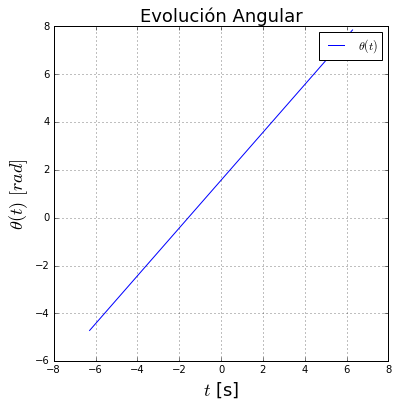

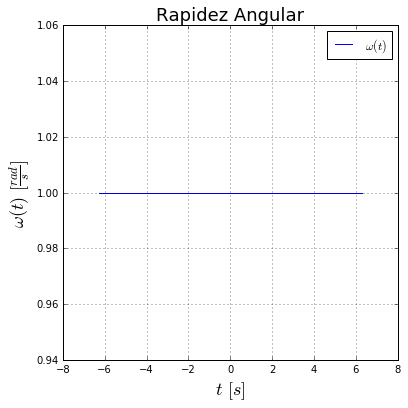

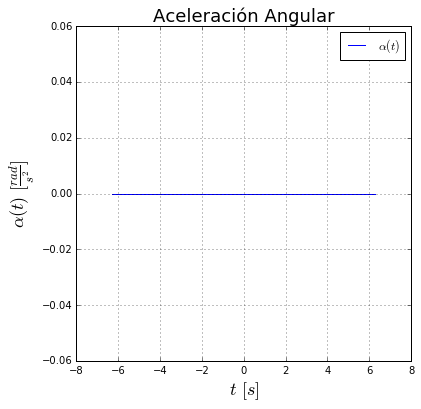

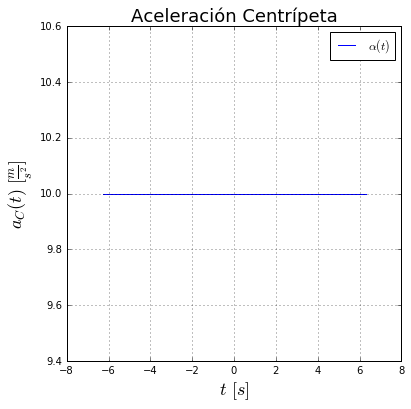

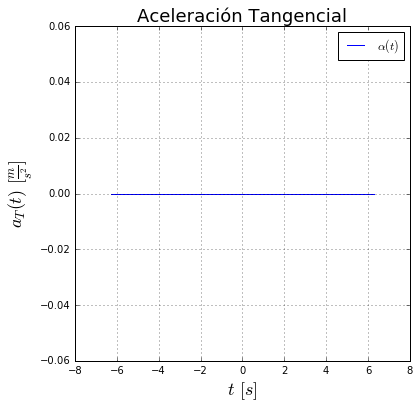

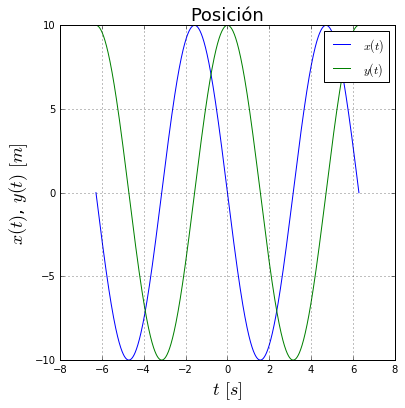

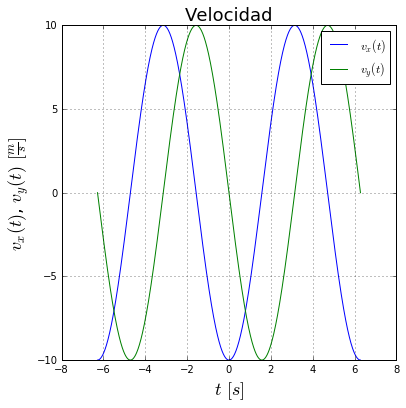

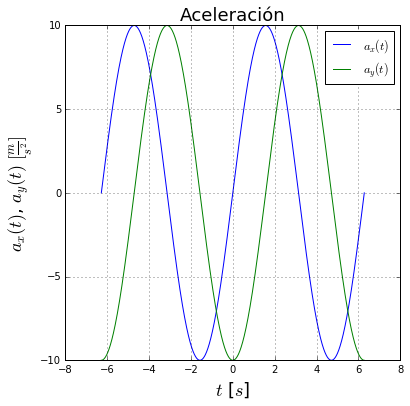

In [9]:
RR = 10 #[m]
ttheta0 = np.pi/2 #[rad]
oomega0 = 1 #[rad/s]
aalpha0 = 0 #[rad/s^2]
delta0 = 0 #[rad/s^3]
#######
plot_dynamics(tt,R=RR,theta0=ttheta0,omega0=oomega0,alpha0=aalpha0,delta0=delta0)

# Ejemplo: 2

$\theta_0 \neq 0$, $\omega_0 \neq 0$, $\alpha_0 \neq 0$ y $\delta_0=0.$

R = 10
theta0 = 1.0471975511965976
omega0 = 1
alpha0 = 2
delta0 = 0


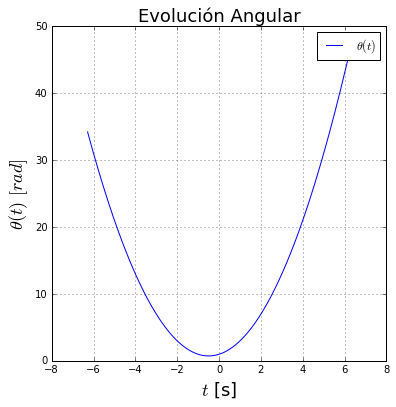

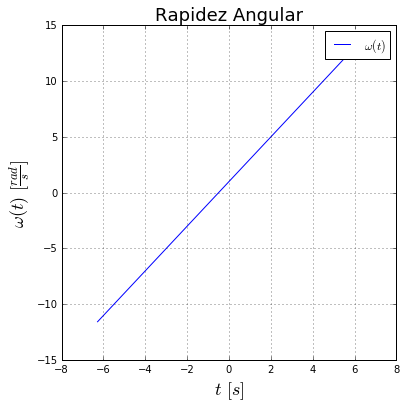

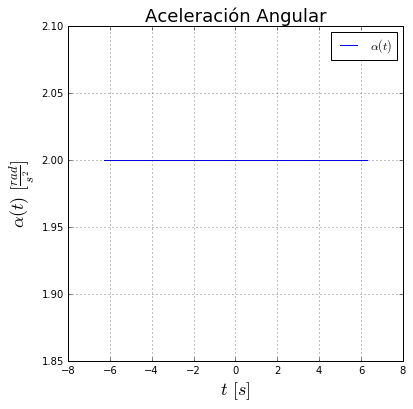

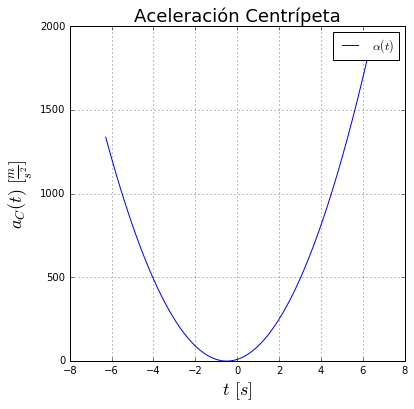

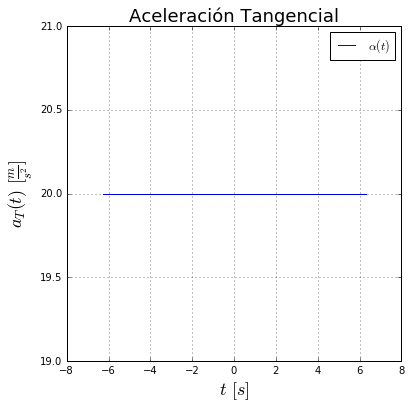

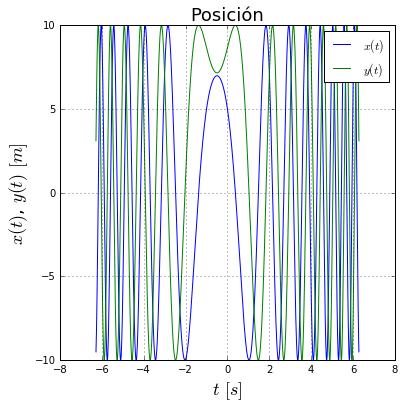

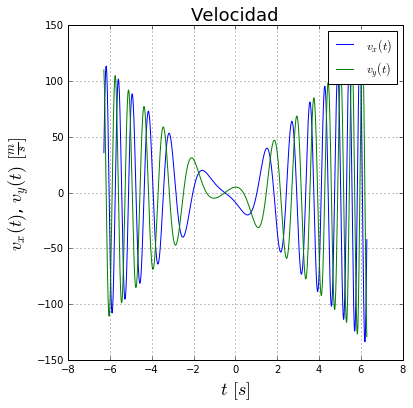

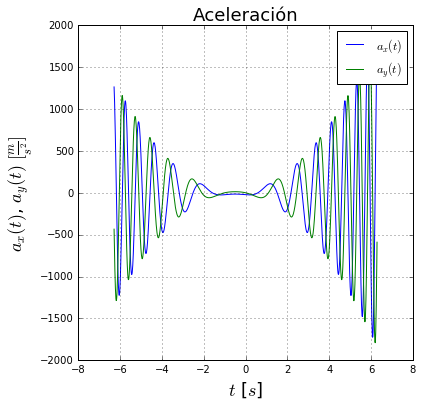

In [10]:
RR = 10 #[m]
ttheta0 = np.pi/3 #[rad]
oomega0 = 1 #[rad/s]
aalpha0 = 2 #[rad/s^2]
delta0 = 0#[rad/s^2]
#######
plot_dynamics(tt,R=RR,theta0=ttheta0,omega0=oomega0,alpha0=aalpha0,delta0=delta0)

# Ejemplo: 3

$\theta_0 \neq 0$, $\omega_0 \neq 0$, $\alpha_0 \neq 0$ y $\delta_0 \neq 0.$

R = 10
theta0 = 1.0471975511965976
omega0 = 1
alpha0 = 2
delta0 = 1


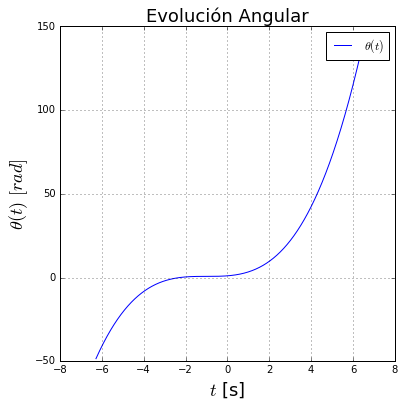

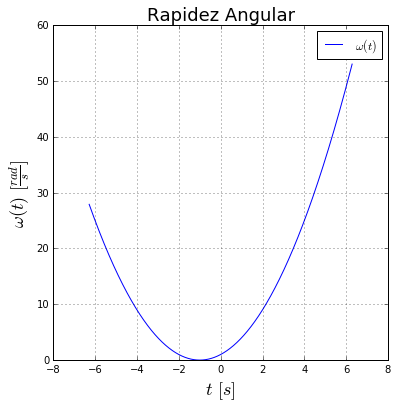

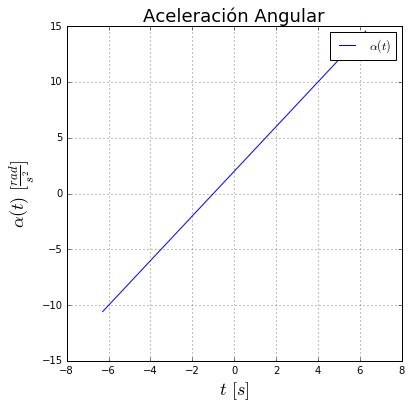

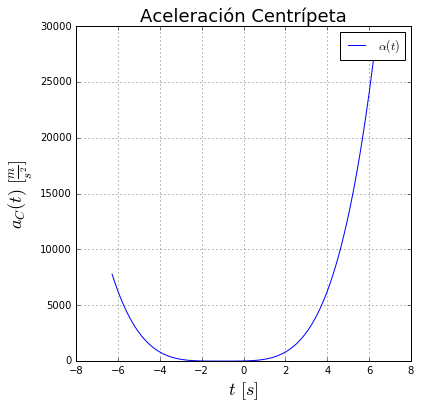

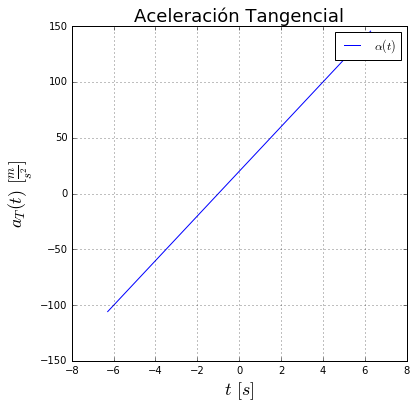

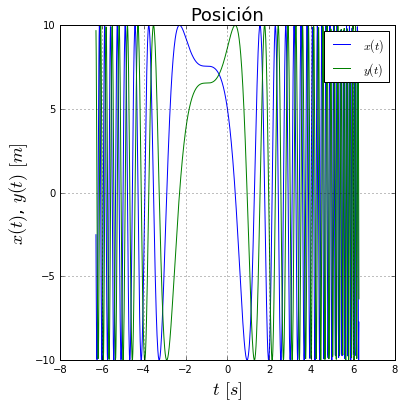

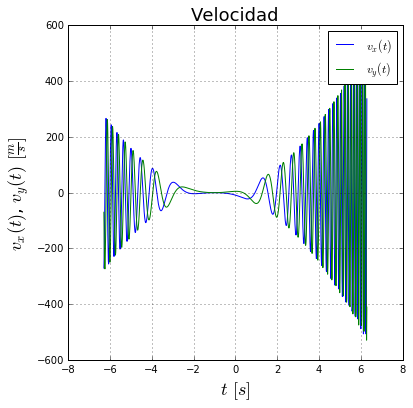

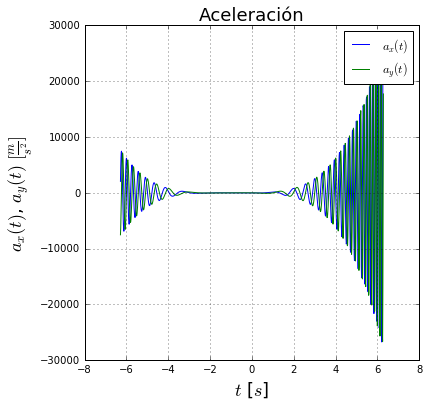

In [11]:
RR = 10 #[m]
ttheta0 = np.pi/3 #[rad]
oomega0 = 1 #[rad/s]
aalpha0 = 2 #[rad/s^2]
delta0 = 1#[rad/s^2]
#######
plot_dynamics(tt,R=RR,theta0=ttheta0,omega0=oomega0,alpha0=aalpha0,delta0=delta0)

# Animación

In [12]:
from __future__ import print_function, division
import vpython as vp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
#Se configura la escena de la animación
vp.scene.title = ("Trayectoria del cuerpo")
vp.scene.background = vp.color.white
vp.scene.width = 700
vp.scene.height = 500
#
#Se dibuja SC con el que se trabajará
lenght_axis = 20
shaftwidth = 1
xaxis = vp.arrow(color=vp.color.black, pos=vp.vector(0,0,0), axis=lenght_axis*vp.vector(1,0,0), shaftwidth=shaftwidth)
xlabel = vp.label(pos=vp.vector(lenght_axis+0.1,0,0), text="X", color=vp.color.black, opacity=0, height=20, box=0)
yaxis = vp.arrow(color=vp.color.black, pos=vp.vector(0,0,0), axis=lenght_axis*vp.vector(0,1,0), shaftwidth=shaftwidth)
ylabel = vp.label(pos=vp.vector(0,lenght_axis+0.1,0), text="Y", color=vp.color.black, opacity=0, height=20, box=0)
zaxis = vp.arrow(color=vp.color.black, pos=vp.vector(0,0,0), axis=lenght_axis*vp.vector(0,0,1), shaftwidth=shaftwidth)
xlabel= vp.label(pos=vp.vector(0,0,lenght_axis+0.1), text="Z", color=vp.color.black, opacity=0, height=20, box=0)

Les sugiero que jueguen con la siguientes condiciones iniciales angulares.

In [14]:
#MCU
#RR = 10 #[m]
#ttheta0 = np.pi/2 #[rad]
#oomega0 = 1 #[rad/s]
#aalpha0 = 0 #[rad/s^2]
#delta0 = 0 #[rad/s^3]
#MCUA
#RR = 10 #[m]
#ttheta0 = np.pi/3 #[rad]
#oomega0 = 1 #[rad/s]
#aalpha0 = 2 #[rad/s^2]
#ddelta0 = 0 #[rad/s^3]
#MCU
RR = 10 #[m]
ttheta0 = np.pi/3 #[rad]
oomega0 = 1 #[rad/s]
aalpha0 = 2 #[rad/s^2]
ddelta0 = 1 #[rad/s^3]

In [15]:
ac0 = a_c(RR,oomega0)
at0 = a_t(RR,aalpha0)
x0,y0,z0 = x_v(0,RR,ttheta0,oomega0,aalpha0,ddelta0),y_v(0,RR,ttheta0,oomega0,aalpha0,ddelta0),0
vx0,vy0,vz0 = vx_v(0,RR,ttheta0,oomega0,aalpha0,ddelta0),vy_v(0,RR,ttheta0,oomega0,aalpha0,ddelta0),0
ax0,ay0,az0 = ax_v(0,RR,ttheta0,oomega0,aalpha0,ddelta0),ay_v(0,RR,ttheta0,oomega0,aalpha0,ddelta0),0
print('theta0 =',ttheta0,'[rad],','omega0 =',oomega0,'[rad/s],','alpha0 =',aalpha0,'[rad/s^2].')
print('a_C0 =',ac0,'[m/s^2],','a_t0 =',at0,'[m/s^2]')
print('x0 =',x0,'[m],','y0 =',y0,'[m],','z0 =',z0,'[m].')
print('vx0 =',vx0,'[m/s],','vy0 =',vy0,'[m/s],','vz0 =',vz0,'[m/s].')
print('ax0 =',ax0,'[m/s^2],','ay0 =',ay0,'[m/s^2],','az0 =',az0,'[m/s^2].')

theta0 = 1.0471975511965976 [rad], omega0 = 1 [rad/s], alpha0 = 2 [rad/s^2].
a_C0 = 10 [m/s^2], a_t0 = 20 [m/s^2]
x0 = 5.000000000000001 [m], y0 = 8.660254037844386 [m], z0 = 0 [m].
vx0 = -8.660254037844386 [m/s], vy0 = 5.000000000000001 [m/s], vz0 = 0 [m/s].
ax0 = -22.32050807568877 [m/s^2], ay0 = 1.3397459621556163 [m/s^2], az0 = 0 [m/s^2].


In [16]:
#Se dibujan cantidades físicas a animar
alpha = 5.
r_vector = vp.vector(x0,y0,z0)
r_axis = vp.arrow(pos=vp.vector(0,0,0), axis = r_vector/r_vector.mag, color=vp.color.red, shaftwidth=shaftwidth)
r_label = vp.label(pos=r_vector+15*r_vector/r_vector.mag, text="r", color=r_axis.color, opacity=0, height=30, box=0)
#
v_vector = vp.vector(vx0,vy0,z0)
v_axis = vp.arrow(pos=r_vector, axis = alpha*v_vector/v_vector.mag, color=vp.color.green, shaftwidth=shaftwidth)
v_label= vp.label(pos=r_vector+v_axis.axis+12*v_vector/v_vector.mag, text="v", color=v_axis.color, opacity=0, height=30, box=0)
#
a_vector = vp.vector(ax0,ay0,az0)
a_axis = vp.arrow(pos=r_vector, axis = alpha*a_vector/a_vector.mag, color=vp.color.blue, shaftwidth=shaftwidth)
a_label = vp.label(pos=r_vector+a_axis.axis+12*a_vector/a_vector.mag, text="a", color=a_axis.color, opacity=0, height=30, box=0)
#
th_label = vp.label(pos=vp.vector(-20,20,0), text="theta(%d [s]) = %2.2f [rad]"%(0,ttheta0), color=vp.color.black, opacity=0, height=10, box=0)
omega_label = vp.label(pos=vp.vector(-20,17.5,0), text="omega(%d [s]) = %2.2f [rad/s]"%(0,oomega0), color=vp.color.black, opacity=0, height=10, box=0)
alpha_label = vp.label(pos=vp.vector(-20,15,0), text="alpha(%d [s]) = %2.2f [rad/s^2]"%(0,v_vector.mag), color=vp.color.black, opacity=0, height=10, box=0)
vv_label = vp.label(pos=vp.vector(20,20,0), text="|v(%d [s])| = %2.2f [m/s]"%(0,v_vector.mag), color=vp.color.black, opacity=0, height=10, box=0)
at_label = vp.label(pos=vp.vector(20,17.5,0), text="|a_t(%d [s])| = %2.2f [m/s^2]"%(0,at0), color=vp.color.black, opacity=0, height=10, box=0)
ac_label = vp.label(pos=vp.vector(20,15,0), text="|a_c(%d [s])| = %2.2f [m/s^2]"%(0,ac0), color=vp.color.black, opacity=0, height=10, box=0)

In [18]:
#Se hace evolucionar la animación
t = np.linspace(0.001,2.*np.pi,1000)
for ti in t:
    vp.rate(50)
    thi,omegai,alphai,rxi,ryi,vxi,vyi,axi,ayi = dynamics(t=ti,R=RR,theta0=ttheta0,omega0=oomega0,alpha0=aalpha0,delta0=ddelta0)
    rzi,vzi,azi = 0,0,0
    r_vector = vp.vector(rxi,ryi,rzi)
    v_vector = vp.vector(vxi,vyi,vzi)
    a_vector = vp.vector(axi,ayi,azi)
    r_axis.axis = r_vector/r_vector.mag
    v_axis.pos = r_vector
    v_axis.axis =  alpha*v_vector/v_vector.mag
    a_axis.pos = r_vector
    a_axis.axis =  alpha*a_vector/a_vector.mag
    r_label.pos = r_vector+15*r_vector/r_vector.mag
    v_label.pos = r_vector+v_axis.axis+12*v_vector/v_vector.mag
    a_label.pos = r_vector+a_axis.axis+12*a_vector/a_vector.mag
    aa_t = a_t(RR,alphai)
    aa_c = a_c(RR,omegai)
    th_label.text = "theta(%2.2f [s]) = %2.2f [rad]"%(ti,thi)
    omega_label.text = "omega(%2.2f [s]) = %2.2f [rad/s]"%(ti,omegai)
    alpha_label.text ="alpha(%2.2f [s]) = %2.2f [rad/s^2]"%(ti,alphai)
    vv_label.text = "|v(%2.2f [s])| = %2.2f [m/s]"%(ti,v_vector.mag)
    at_label.text = "|a_t(%2.2f [s])| = %2.2f [m/s^2]"%(ti,aa_t)
    ac_label.text = "|a_c(%2.2f [s])| = %2.2f [m/s^2]"%(ti,aa_c)
    vp.sphere(pos=r_vector, radius=0.5, color=r_axis.color)